<a href="https://colab.research.google.com/github/Abdulla-creator-coder/Test-project/blob/main/indian_sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

zip_path = "/content/drive/MyDrive/AI/Indiansignlanguage.zip"
print(os.path.exists(zip_path))

True


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/AI/Indiansignlanguage.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Completed!")

Extraction Completed!


In [ ]:
import os

base_path = "/content/dataset"

print(os.listdir(base_path))
print(os.listdir(base_path + "/Data"))

['Data']
['G', 'D', 'U', 'O', 'I', 'E', 'H', 'S', 'Q', 'R', 'B', 'F', 'K', 'X', 'T', 'Y', 'N', 'L', 'M', 'A', 'V', 'C', 'W', 'P']


In [ ]:
data_path = "/content/dataset/Data"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3987 images belonging to 24 classes.
Found 985 images belonging to 24 classes.


In [ ]:
print("Classes:", train_generator.class_indices)
print("Total classes:", train_generator.num_classes)

Classes: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}
Total classes: 24


In [ ]:
total_images = 0

for class_name in sorted(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_name)

    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path)
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        print(f"Class '{class_name}' → {len(images)} images")
        total_images += len(images)

print("\nTotal Images in Dataset:", total_images)

Class 'A' → 242 images
Class 'B' → 259 images
Class 'C' → 247 images
Class 'D' → 147 images
Class 'E' → 243 images
Class 'F' → 226 images
Class 'G' → 241 images
Class 'H' → 116 images
Class 'I' → 179 images
Class 'K' → 245 images
Class 'L' → 182 images
Class 'M' → 235 images
Class 'N' → 237 images
Class 'O' → 229 images
Class 'P' → 234 images
Class 'Q' → 216 images
Class 'R' → 211 images
Class 'S' → 229 images
Class 'T' → 216 images
Class 'U' → 135 images
Class 'V' → 122 images
Class 'W' → 128 images
Class 'X' → 202 images
Class 'Y' → 251 images

Total Images in Dataset: 4972


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_labels = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(0.8563144329896907), 1: np.float64(0.7986778846153846), 2: np.float64(0.8390151515151515), 3: np.float64(1.4078389830508475), 4: np.float64(0.8519230769230769), 5: np.float64(0.9178176795580111), 6: np.float64(0.8607512953367875), 7: np.float64(1.7862903225806452), 8: np.float64(1.1536458333333333), 9: np.float64(0.8475765306122449), 10: np.float64(1.1378424657534247), 11: np.float64(0.8836436170212766), 12: np.float64(0.8743421052631579), 13: np.float64(0.9028532608695652), 14: np.float64(0.8836436170212766), 15: np.float64(0.9602601156069365), 16: np.float64(0.9829881656804734), 17: np.float64(0.9028532608695652), 18: np.float64(0.9602601156069365), 19: np.float64(1.5381944444444444), 20: np.float64(1.6951530612244898), 21: np.float64(1.6128640776699028), 22: np.float64(1.025462962962963), 23: np.float64(0.8264925373134329)}


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 110s 825ms/step - accuracy: 0.0991 - loss: 3.3860 - val_accuracy: 0.5838 - val_loss: 2.1053
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 103s 819ms/step - accuracy: 0.4096 - loss: 1.9988 - val_accuracy: 0.8213 - val_loss: 1.2549
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 99s 794ms/step - accuracy: 0.6447 - loss: 1.2985 - val_accuracy: 0.8822 - val_loss: 0.8166
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 99s 793ms/step - accuracy: 0.7313 - loss: 0.9749 - val_accuracy: 0.9168 - val_loss: 0.5871
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 121s 969ms/step - accuracy: 0.8025 - loss: 0.7532 - val_accuracy: 0.9147 - val_loss: 0.4922
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 100s 800ms/step - accuracy: 0.8555 - loss: 0.5952 - val_accuracy: 0.9411 - val_loss: 0.3982
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 788ms/step - accuracy: 0.8637 - loss: 0.5121 - val_accuracy: 0.9350 - val_loss: 0.3509
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 787ms/step - accuracy: 0.8905 - lo

31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 771ms/step


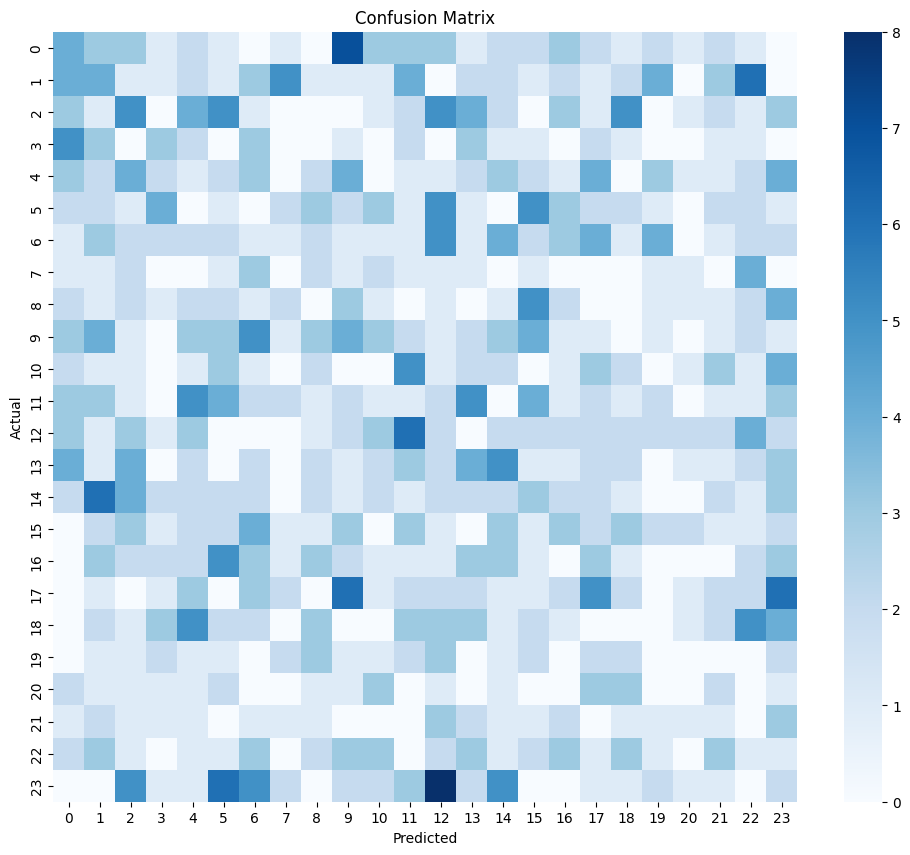

              precision    recall  f1-score   support

           A       0.09      0.08      0.08        48
           B       0.08      0.08      0.08        51
           C       0.10      0.10      0.10        49
           D       0.10      0.10      0.10        29
           E       0.02      0.02      0.02        48
           F       0.02      0.02      0.02        45
           G       0.02      0.02      0.02        48
           H       0.00      0.00      0.00        23
           I       0.00      0.00      0.00        35
           K       0.08      0.08      0.08        49
           L       0.00      0.00      0.00        36
           M       0.02      0.02      0.02        47
           N       0.04      0.04      0.04        47
           O       0.09      0.09      0.09        45
           P       0.04      0.04      0.04        46
           Q       0.02      0.02      0.02        43
           R       0.00      0.00      0.00        42
           S       0.11    

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(val_generator.classes, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))

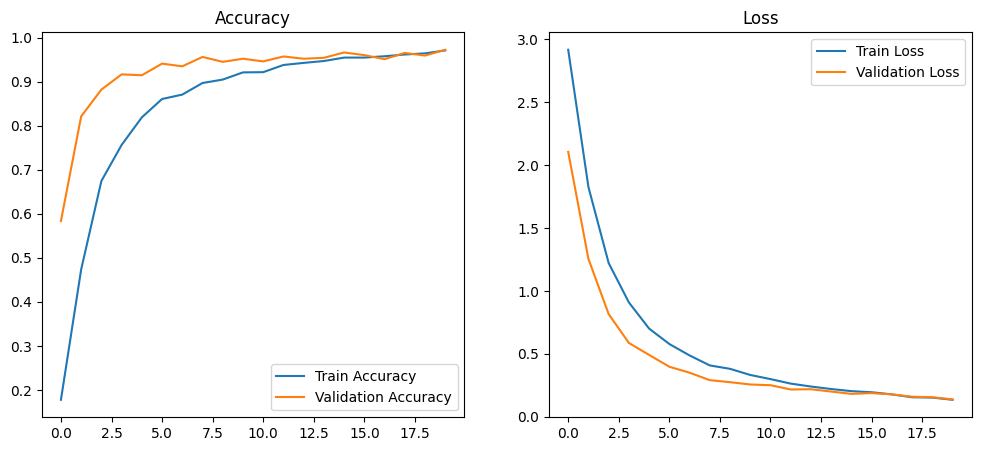

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()